In [4]:
import pandas as pd
import numpy as np 


import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV



In [113]:
df=sns.load_dataset("iris")

In [114]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [115]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [116]:
df=df[df['species']!='versicolor']

In [117]:
df['species'].unique()

array(['setosa', 'virginica'], dtype=object)

In [118]:
mapper={'setosa':0,"virginica":1}

df['species']=df['species'].map(mapper)

C:\Users\Prashant Kumar Singh\AppData\Local\Temp\ipykernel_6924\2148545732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].map(mapper)


In [119]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


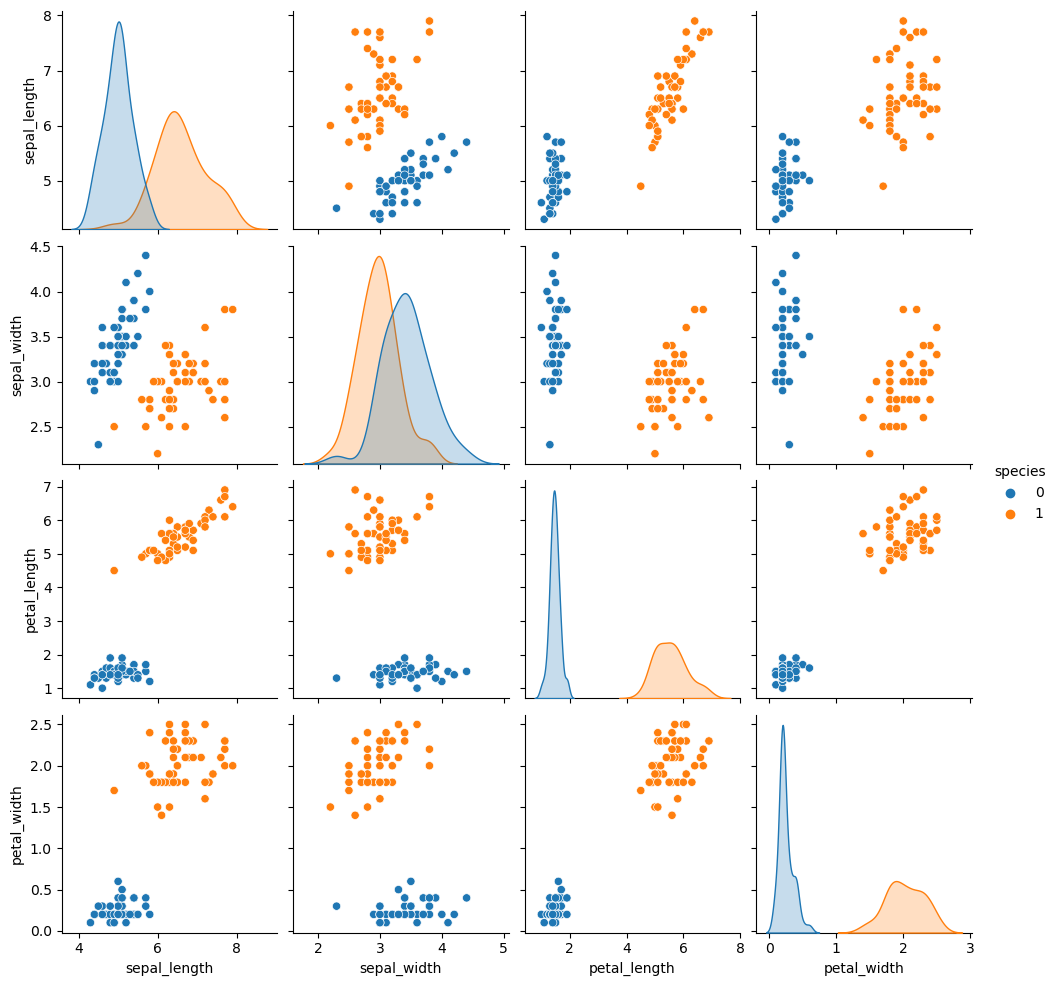

In [120]:
sns.pairplot(df,hue='species')

In [121]:
### Let's split the data into train and test

X=df.iloc[:,:-1]

Y=df.iloc[:,-1]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [122]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [123]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
43,5.0,3.5,1.6,0.6
112,6.8,3.0,5.5,2.1
3,4.6,3.1,1.5,0.2
121,5.6,2.8,4.9,2.0
45,4.8,3.0,1.4,0.3


In [124]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
26,5.0,3.4,1.6,0.4
136,6.3,3.4,5.6,2.4
2,4.7,3.2,1.3,0.2
105,7.6,3.0,6.6,2.1
125,7.2,3.2,6.0,1.8


In [125]:
### transfrom the independent feature because conversion with gradient decent will be faster 

scaler=StandardScaler()

In [126]:
## Let the scaler learn parameter from the X_train data

scaler.fit(X_train)

### let the X_train and X_test transfrom using scaler learn parameters
X_test=scaler.transform(X_test)

X_train=scaler.transform(X_train)

In [127]:
scaler.get_feature_names_out()

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [128]:
X_train=pd.DataFrame(X_train,columns=scaler.get_feature_names_out())

In [129]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.876063,0.702458,-0.919717,-0.586461
1,1.055838,-0.473204,0.964405,1.065542
2,-1.305375,-0.238072,-0.968028,-1.026995
3,-0.232096,-0.943469,0.674540,0.955408
4,-1.090719,-0.473204,-1.016339,-0.916861


In [130]:
X_test

array([[-0.87606349,  0.46732578, -0.91971701, -0.80672797],
       [ 0.51919842,  0.46732578,  1.01271532,  1.39594225],
       [-1.19804701, -0.00293916, -1.06464944, -1.02699499],
       [ 1.91446033, -0.47320409,  1.4958234 ,  1.06554172],
       [ 1.48514898, -0.00293916,  1.20595855,  0.73514119],
       [ 1.05583762, -0.00293916,  1.15764774,  1.28580874],
       [-0.44675213,  1.64298813, -1.06464944, -0.80672797],
       [ 0.51919842, -1.1786015 ,  0.67453966,  0.73514119],
       [ 0.7338541 , -0.47320409,  1.10933694,  1.17567523],
       [ 0.94850978, -0.47320409,  0.81947209,  1.28580874],
       [ 0.51919842, -0.70833656,  1.01271532,  0.73514119],
       [-0.01744077, -1.1786015 ,  0.77116128,  0.8452747 ],
       [ 0.62652626, -0.94346903,  1.01271532,  1.06554172],
       [-1.62735836, -0.47320409, -1.16127105, -1.1371285 ],
       [-0.87606349,  0.46732578, -0.96802782, -1.02699499],
       [-1.09071917, -0.23807162, -0.91971701, -1.02699499],
       [-1.30537484,  0.

In [131]:
X_test=pd.DataFrame(X_test,columns=scaler.get_feature_names_out())

In [132]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.876063,0.467326,-0.919717,-0.806728
1,0.519198,0.467326,1.012715,1.395942
2,-1.198047,-0.002939,-1.064649,-1.026995
3,1.914460,-0.473204,1.495823,1.065542
4,1.485149,-0.002939,1.205959,0.735141


In [133]:
### Apply the logestic regression

## lets intilize the logestic regression

log_reg=LogisticRegression()

In [134]:
parameters={'C':[0.1,0.5,1,5,10,20,30,50,100],'penalty':['l1','l2','elasticnet']}

model=GridSearchCV(log_reg,param_grid=parameters,cv=5)

In [135]:
model.fit(X_train,Y_train)

C:\Users\Prashant Kumar Singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Prashant Kumar Singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prashant Kumar Singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Prashant Kumar Singh\anaconda3\lib\site-packages\sklearn\linear_model\_logist

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 20, 30, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [136]:
model.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [137]:
pred_y=model.predict(X_test)

In [138]:
pred_y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [105]:
## check the performance of the model

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [139]:
accuracy_score(Y_test,pred_y)

1.0

In [140]:
confusion_matrix(Y_test,pred_y)

array([[10,  0],
       [ 0, 10]], dtype=int64)

In [141]:
f1_score(Y_test,pred_y)

1.0

In [142]:
precision_score(Y_test,pred_y)

1.0

In [143]:
recall_score(Y_test,pred_y)

1.0